# **Customer Conversion Prediction**

### **Problem Statement**
You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.


### **Features:**

*  age (numeric)
*   job : type of job
*   marital : marital status
*   educational_qual : education status
*   call_type : contact communication type
*   day: last contact day of the month (numeric)
*   mon: last contact month of year
*   dur: last contact duration, in seconds (numeric)
*   num_calls: number of contacts performed during this campaign and for this   client
*   prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
*   Output variable (desired target):
y - has the client subscribed to the insurance?

# **Importing Libraries**

In [534]:
# for data reading and data manipulation
import numpy as np
import pandas as pd
import statistics as st

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading Dataset**

In [535]:
df=pd.read_csv("/content/drive/MyDrive/guviprojectdata.csv")

# **Analysis of Data**

In [536]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [537]:
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [538]:
df.shape

(45211, 11)

In [539]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [540]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [541]:
df['y'].value_counts() #imbalanced data

no     39922
yes     5289
Name: y, dtype: int64

# **Data Cleaning**



## Data Type

In [542]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [543]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

**There is no need to change any datatype of the columns**

##Missing Values


In [544]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

##Duplicates Rows

In [545]:
df.shape

(45211, 11)

In [546]:
df.duplicated().sum()

6

**we can find 6 duplicate datas. So will drop the duplicates.**

In [547]:
df = df.drop_duplicates()

In [548]:
df.duplicated().sum()

0

In [549]:
df.shape

(45205, 11)

##1.Age


In [550]:
df['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [551]:
df.age.value_counts()

32    2084
31    1996
33    1972
34    1929
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [552]:
df["age"].describe()

count    45205.000000
mean        40.937087
std         10.619130
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

###Outliers (Age)

<Axes: xlabel='age'>

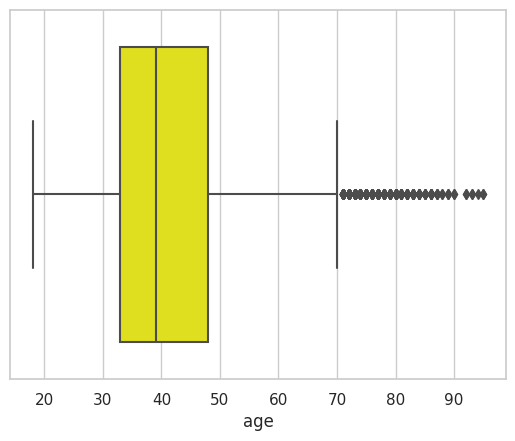

In [553]:
sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='yellow')

In [554]:
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper:",int(upper))
print("Lower:", int(lower))

Upper: 70
Lower: 10


In [555]:
df.age = df.age.clip(10,70)

<Axes: xlabel='age'>

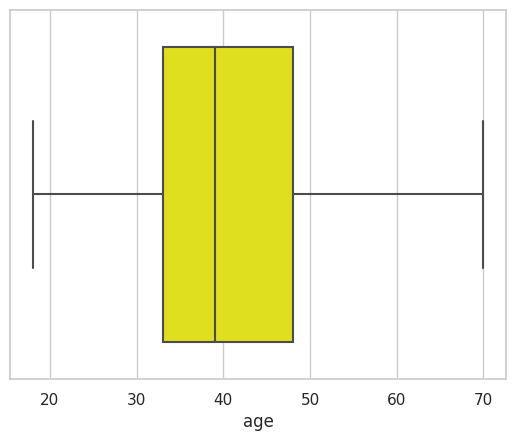

In [556]:
sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='yellow')

##2.Job

In [557]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [558]:
df.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [559]:
df['job'] =df['job'].replace('unknown',np.nan)

In [560]:
pd.DataFrame(df.isna().mean()*100).T

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,0.0,0.637098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [561]:
df.job.isnull().sum()

288

In [562]:
df=df.dropna(subset=['job'])

In [563]:
df.job.isnull().sum()

0

In [564]:
pd.DataFrame(df.isna().mean()*100).T #missing Value dropped

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##3.Marital Status

In [565]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [566]:
df.marital.value_counts()

married     27007
single      12720
divorced     5190
Name: marital, dtype: int64

In [567]:
df.job.isnull().sum()

0

##4.Education Qualification

In [568]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [569]:
df.education_qual.value_counts()

secondary    23128
tertiary     13260
primary       6799
unknown       1730
Name: education_qual, dtype: int64

In [570]:
df['education_qual'] =df['education_qual'].replace('unknown',np.nan)

In [571]:
pd.DataFrame(df.isna().mean()*100).T

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,0.0,0.0,0.0,3.851548,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [572]:
df.education_qual.isnull().sum()

1730

In [573]:
df = df.dropna(subset=['education_qual'])

In [574]:
df.education_qual.isnull().sum()

0

In [575]:
pd.DataFrame(df.isna().mean()*100).T #missing values dropped

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##5.Call Type

In [576]:
df['call_type'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [577]:
df.call_type.value_counts()

cellular     28210
unknown      12283
telephone     2694
Name: call_type, dtype: int64

In [578]:
df['call_type'] =df['call_type'].replace('unknown',np.nan)

In [579]:
# looking for the percentage of null data in the dataframe
pd.DataFrame(df.isna().mean()*100).T

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,0.0,0.0,0.0,0.0,28.441429,0.0,0.0,0.0,0.0,0.0,0.0


In [580]:
df['call_type'] =df['call_type'].replace(np.nan,'unknown')

In [581]:
pd.DataFrame(df.isna().mean()*100).T

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##6.Day

In [582]:
df.day.value_counts()

20    2628
18    2227
21    1961
17    1872
6     1817
5     1796
14    1784
8     1758
7     1739
28    1739
29    1661
19    1656
15    1649
12    1542
13    1529
9     1483
30    1481
11    1397
4     1372
16    1331
2     1243
27    1072
3     1039
26     994
23     900
22     875
25     810
31     597
10     504
24     426
1      305
Name: day, dtype: int64

In [583]:
df["day"].describe()

count    43187.000000
mean        15.809896
std          8.305826
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

###Outliers (Day)

<Axes: xlabel='day'>

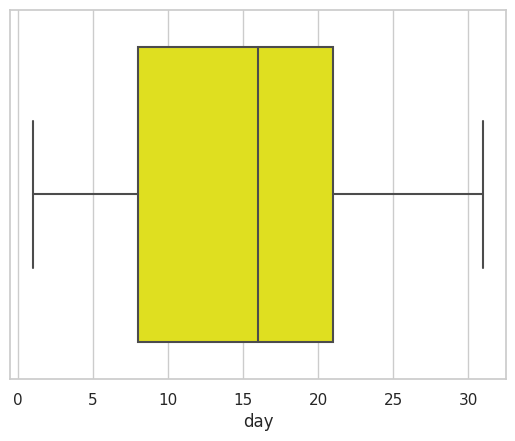

In [584]:
#Outliers

sns.set(style="whitegrid")
sns.boxplot(x=df['day'], color='yellow')

In [585]:
q1,q3=np.percentile(df["day"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound:", lower)

Upper bound: 40.5 Lower bound: -11.5


In [586]:
df.day.describe()

count    43187.000000
mean        15.809896
std          8.305826
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

**There is no outliers**

##7.Month


In [587]:
df['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [588]:
df.mon.value_counts()

may    13191
jul     6600
aug     6035
jun     4978
nov     3842
apr     2820
feb     2533
jan     1318
oct      690
sep      532
mar      448
dec      200
Name: mon, dtype: int64

##8.Duration

In [589]:
df.dur.value_counts()

124     176
90      172
89      172
114     172
122     169
       ... 
1327      1
1331      1
1608      1
1833      1
1556      1
Name: dur, Length: 1558, dtype: int64

In [590]:
df["dur"].describe()

count    43187.000000
mean       258.344340
std        258.173244
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max       4918.000000
Name: dur, dtype: float64

###Outliers (Duration)

<Axes: >

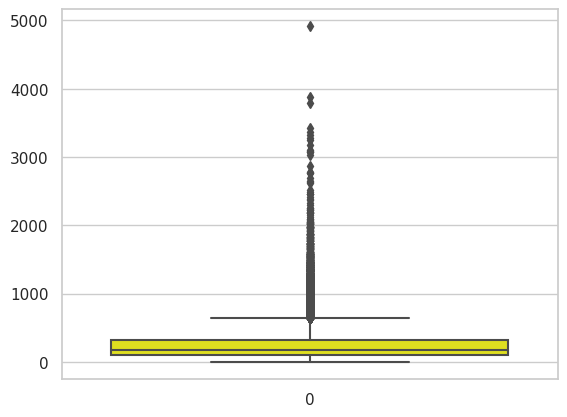

In [591]:
sns.set(style="whitegrid")
sns.boxplot(df['dur'], color='yellow')

In [592]:
q1,q3=np.percentile(df["dur"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",int(upper),"Lower bound :", int(lower))

Upper bound: 640 Lower bound : -219


In [593]:
df.dur = df.dur.clip(0,640)

In [594]:
df.dur.describe()

count    43187.000000
mean       234.751870
std        176.156766
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max        640.000000
Name: dur, dtype: float64

<Axes: >

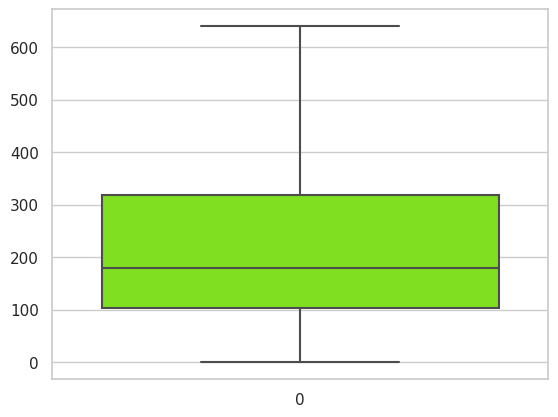

In [595]:
sns.set(style="whitegrid")
sns.boxplot(df['dur'], color='Chartreuse')

##9.Number of Calls

In [596]:
df.num_calls.value_counts()

1     16740
2     11936
3      5277
4      3397
5      1703
6      1234
7       696
8       516
9       307
10      255
11      190
12      149
13      123
14       85
15       81
16       75
17       65
18       47
19       43
20       42
21       33
25       22
22       20
24       20
23       20
28       16
29       13
26       12
31       11
32        9
27        9
30        8
33        6
34        4
36        4
38        3
35        3
43        2
50        2
41        2
51        1
37        1
46        1
55        1
58        1
39        1
44        1
Name: num_calls, dtype: int64

In [597]:
df["num_calls"].describe()

count    43187.000000
mean         2.758237
std          3.064160
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: num_calls, dtype: float64

###Outliers (Number of Calls)

<Axes: >

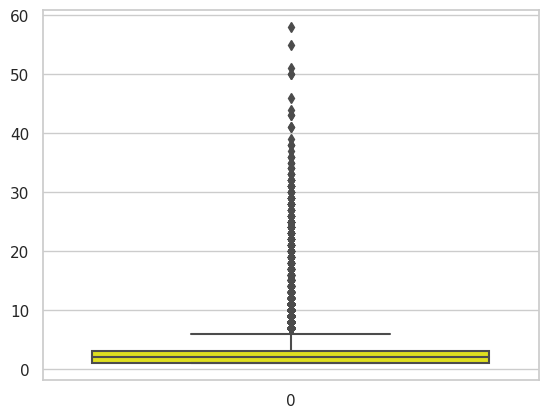

In [598]:
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'], color='yellow')

In [599]:
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 6.0 Lower bound : -2.0


In [600]:
df.num_calls = df.num_calls.clip(0,6.0)

<Axes: >

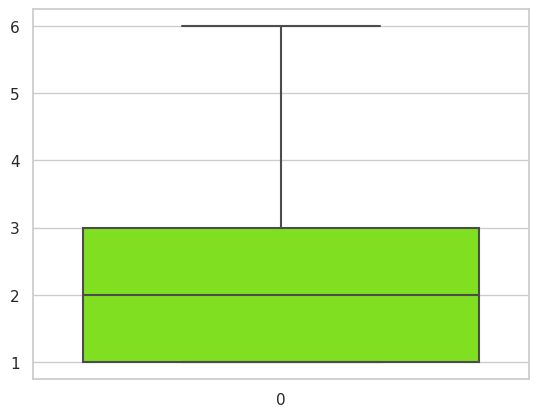

In [601]:
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'], color='Chartreuse')

##10.Previous Outcome

In [602]:
df['prev_outcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [603]:
df.prev_outcome.value_counts()

unknown    35280
failure     4709
other       1774
success     1424
Name: prev_outcome, dtype: int64

In [604]:
df['prev_outcome'] =df['prev_outcome'].replace('unknown',np.nan)

In [605]:
# looking for the percentage of null data in the dataframe
pd.DataFrame(df.isna().mean()*100).T

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.69125,0.0


In [606]:
df['prev_outcome'] =df['prev_outcome'].replace(np.nan,"unknown")

##11.Y

In [607]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [608]:
df.y.value_counts()

no     38166
yes     5021
Name: y, dtype: int64

#**EDA**

##Distribution of Features

---



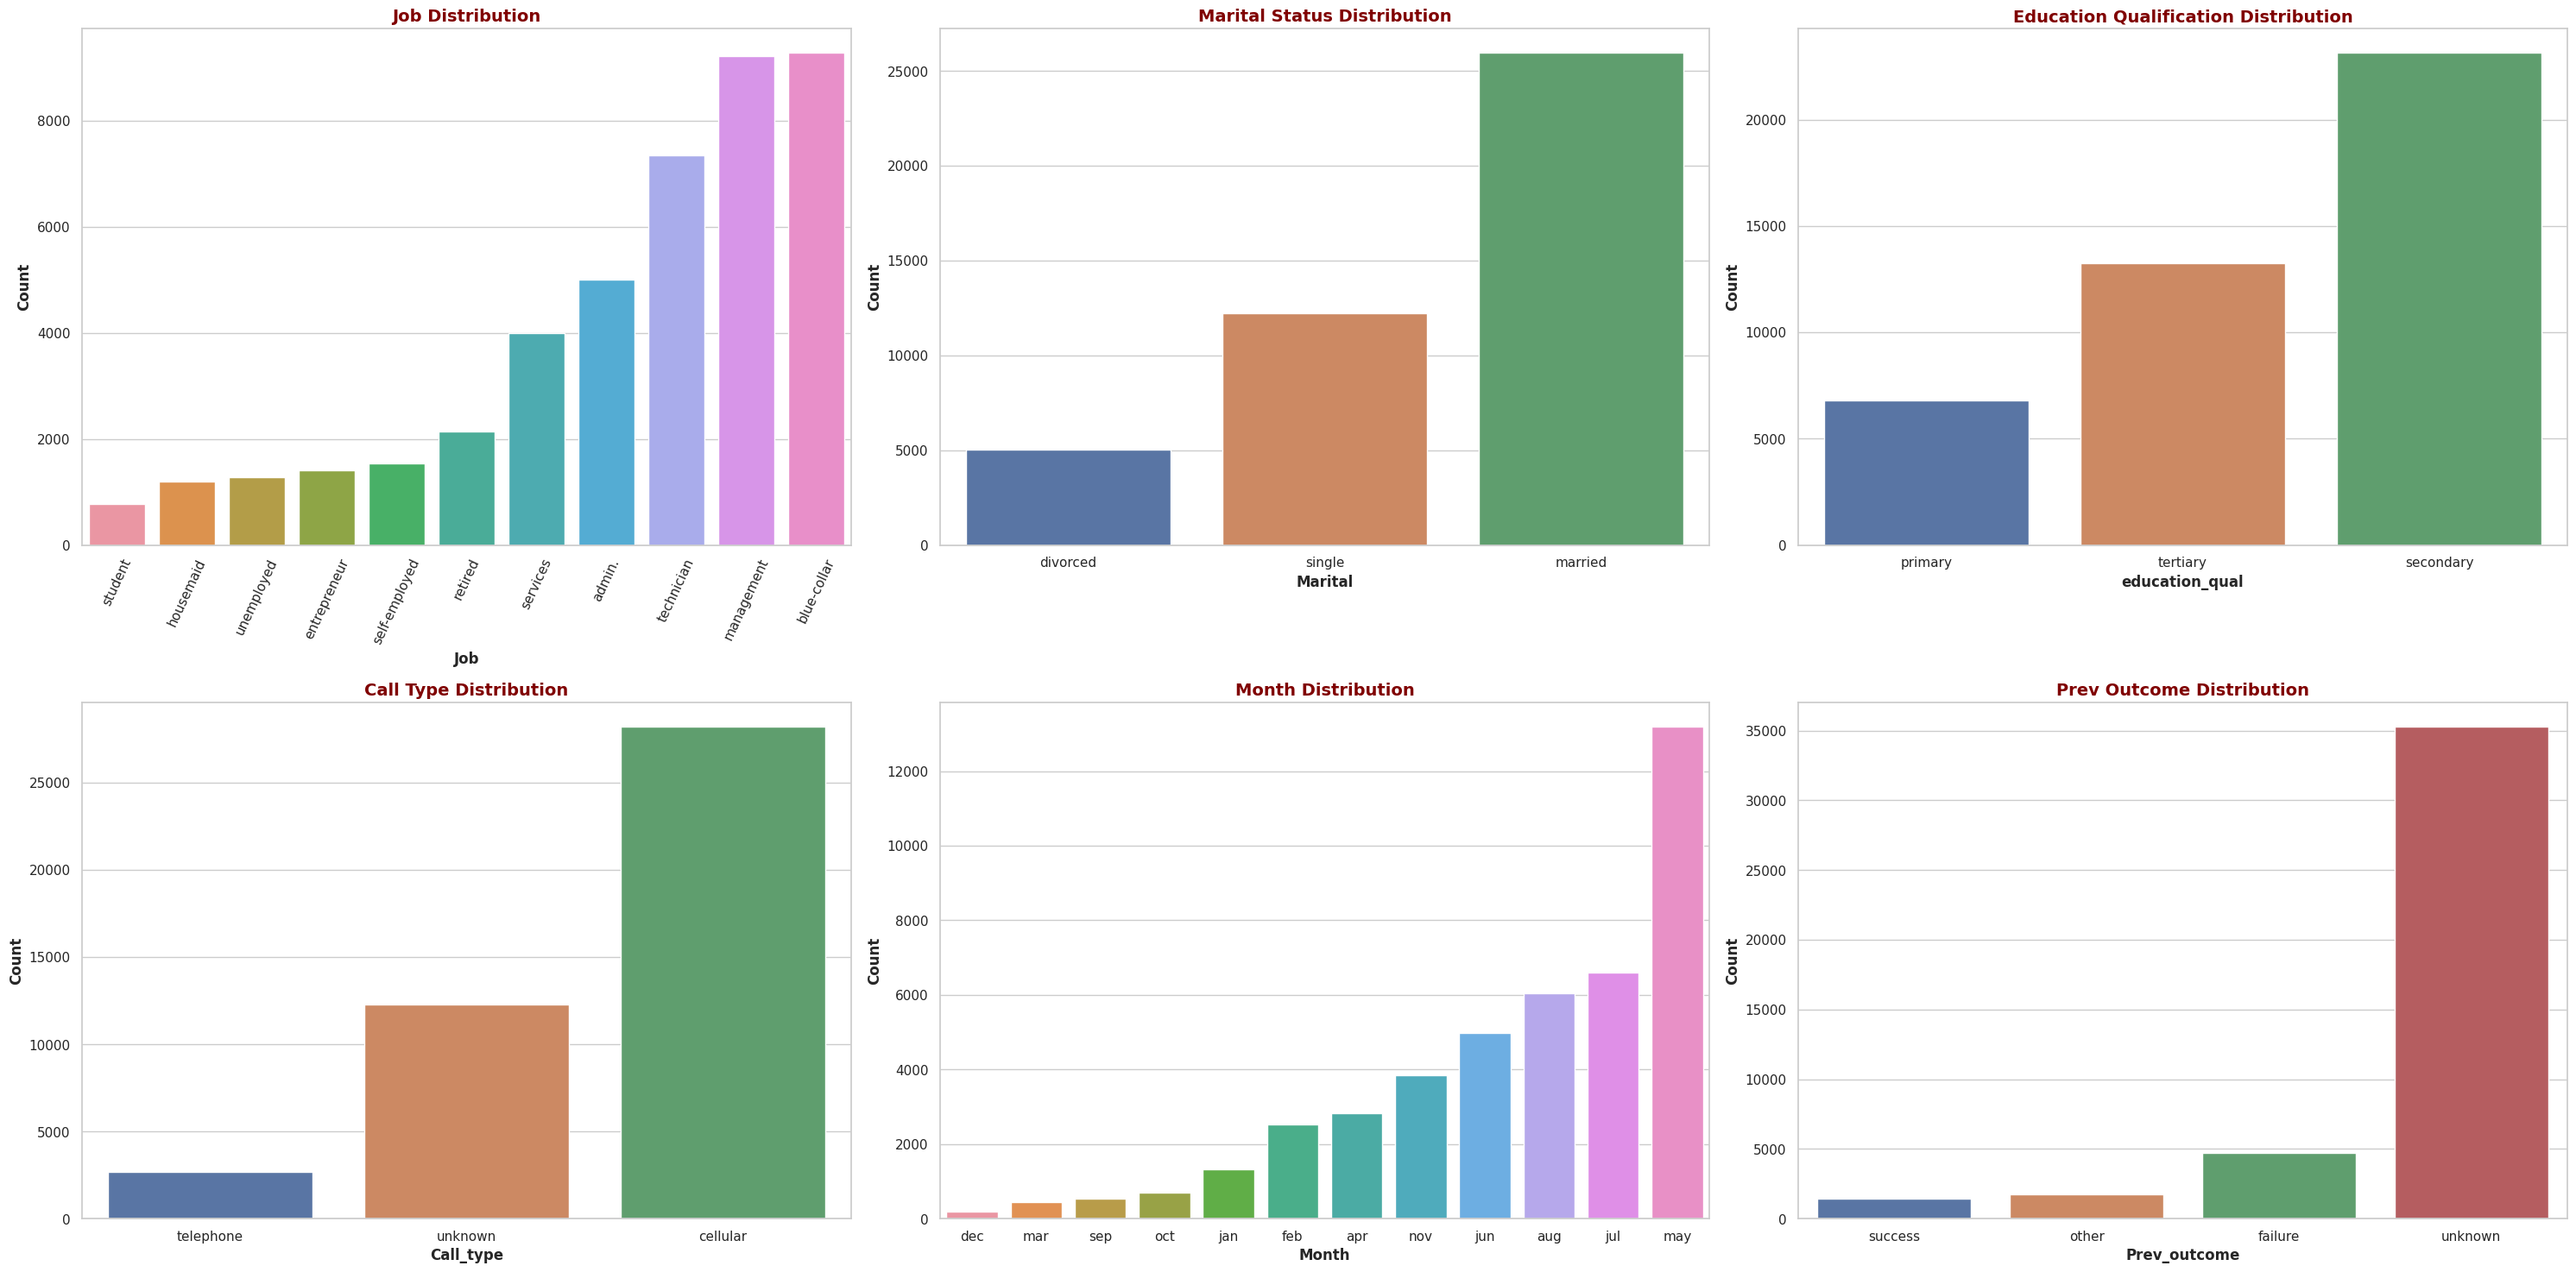

In [609]:
#plotting count plots for all the categorical columns

plt.figure(figsize=(30,30))

plt.subplot(431)
sns.countplot(data=df,x='job',order=df['job'].value_counts().index[::-1])
plt.xticks(rotation=65)
plt.xlabel('Job',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Job Distribution', fontsize = 14, color='maroon', fontweight='bold')

plt.subplot(432)
sns.countplot(data=df,x='marital',order=df['marital'].value_counts().index[::-1])
plt.xticks(rotation=0)
plt.xlabel('Marital',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Marital Status Distribution', fontsize = 14, color='maroon', fontweight='bold')

plt.subplot(433)
sns.countplot(data=df,x='education_qual',order=df['education_qual'].value_counts().index[::-1])
plt.xticks(rotation=0)
plt.xlabel('education_qual',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Education Qualification Distribution', fontsize = 14, color='maroon', fontweight='bold')

plt.subplot(434)
sns.countplot(data=df,x='call_type',order=df['call_type'].value_counts().index[::-1])
plt.xticks(rotation=0)
plt.xlabel('Call_type',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Call Type Distribution',fontsize = 14, color='maroon', fontweight='bold')

plt.subplot(435)
sns.countplot(data=df,x='mon',order=df['mon'].value_counts().index[::-1])
plt.xticks(rotation=0)
plt.xlabel('Month',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Month Distribution', fontsize = 14, color='maroon', fontweight='bold')

plt.subplot(436)
sns.countplot(data=df,x='prev_outcome',order=df['prev_outcome'].value_counts().index[::-1])
plt.xticks(rotation=0)
plt.xlabel('Prev_outcome',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Prev Outcome Distribution', fontsize = 14, color='maroon', fontweight='bold')

plt.tight_layout()

### **Interpretation:**

### **Job**

*   Most Target : blue-collar and management
*   Least Target : students and house maid

### **Marital Status**

*   Most Target : Maried
*   Least Target : Divorced

### **Education**

*   Most Target : Secondary
*   Least Target : Primary

### **Call Type**

*   Most Target : cellular
*   Least Target : telephone

### **Month**

*   Most Target : May
*   Least Target : December

### **10. Previous Outcome**

*   Most Target : most people previous outcome was unknown
*   Least Target : Previous outcome for least people are success


##Feature Vs Target (Categorical Columns)

In [610]:
job_order=df['job'].value_counts().index[::-1]
marital_order=df['marital'].value_counts().index[::-1]
education_qual_order=df['education_qual'].value_counts().index[::-1]
call_type_order=df['call_type'].value_counts().index[::-1]
mon_order=df['mon'].value_counts().index[::-1]
prev_outcome_order=df['prev_outcome'].value_counts().index[::-1]

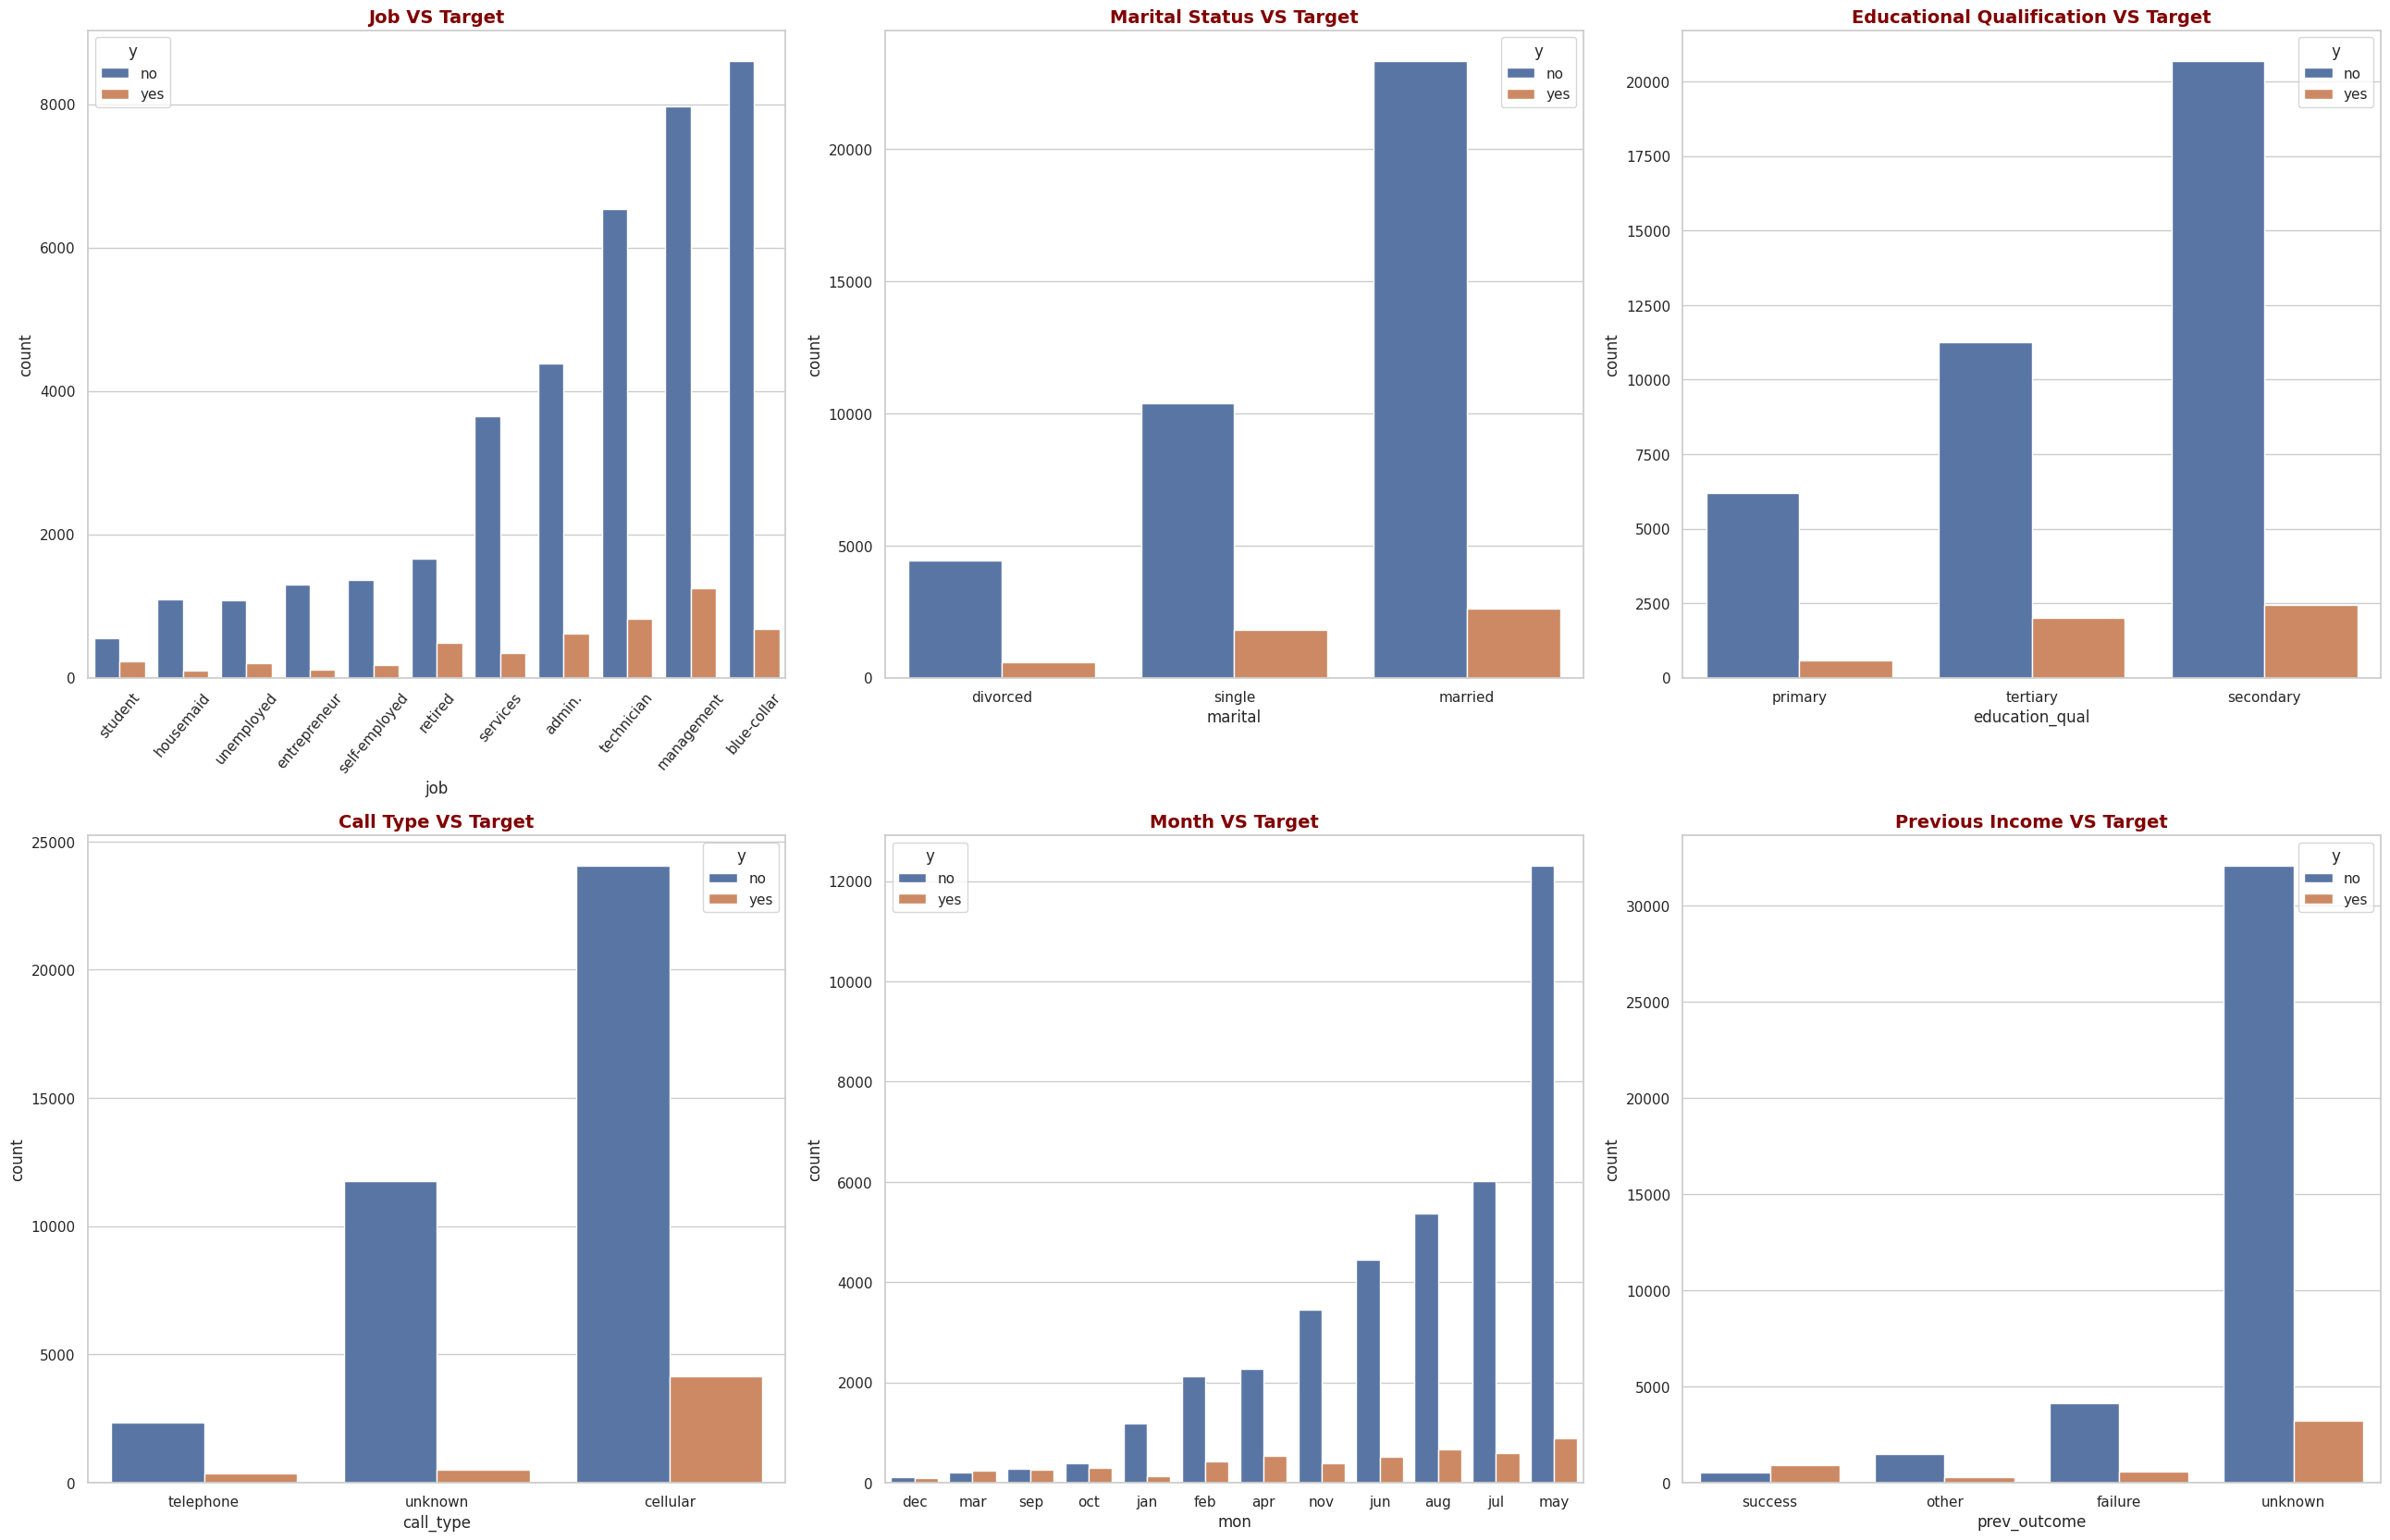

In [611]:
plt.figure(figsize=(26,25))

#Job vs Target
plt.subplot(331)
sns.countplot(x='job', hue='y', data=df,order=job_order)
plt.xticks(rotation=50)
plt.title('Job VS Target', fontsize = 14, color='maroon', fontweight='bold')

#Marital Status vs Target
plt.subplot(332)
sns.countplot(x='marital', hue='y', data=df,order=marital_order)
plt.xticks(rotation=0)
plt.title('Marital Status VS Target', fontsize = 14, color='maroon', fontweight='bold')

#Educational Qualification vs Target
plt.subplot(333)
sns.countplot(x='education_qual', hue='y', data=df,order=education_qual_order)
plt.xticks(rotation=0)
plt.title('Educational Qualification VS Target', fontsize = 14, color='maroon', fontweight='bold')

#Call Type vs Target
plt.subplot(334)
sns.countplot(x='call_type', hue='y', data=df,order=call_type_order)
plt.xticks(rotation=0)
plt.title('Call Type VS Target', fontsize = 14, color='maroon', fontweight='bold')

#Month vs Target
plt.subplot(335)
sns.countplot(x='mon', hue='y', data=df,order=mon_order)
plt.xticks(rotation=0)
plt.title('Month VS Target', fontsize = 14, color='maroon', fontweight='bold')

#Previous Income vs Target
plt.subplot(336)
sns.countplot(x='prev_outcome', hue='y', data=df,order=prev_outcome_order)
plt.xticks(rotation=0)
plt.title('Previous Income VS Target', fontsize = 14, color='maroon', fontweight='bold')

plt.tight_layout()

## Feature vs Target (Numerical Columns)

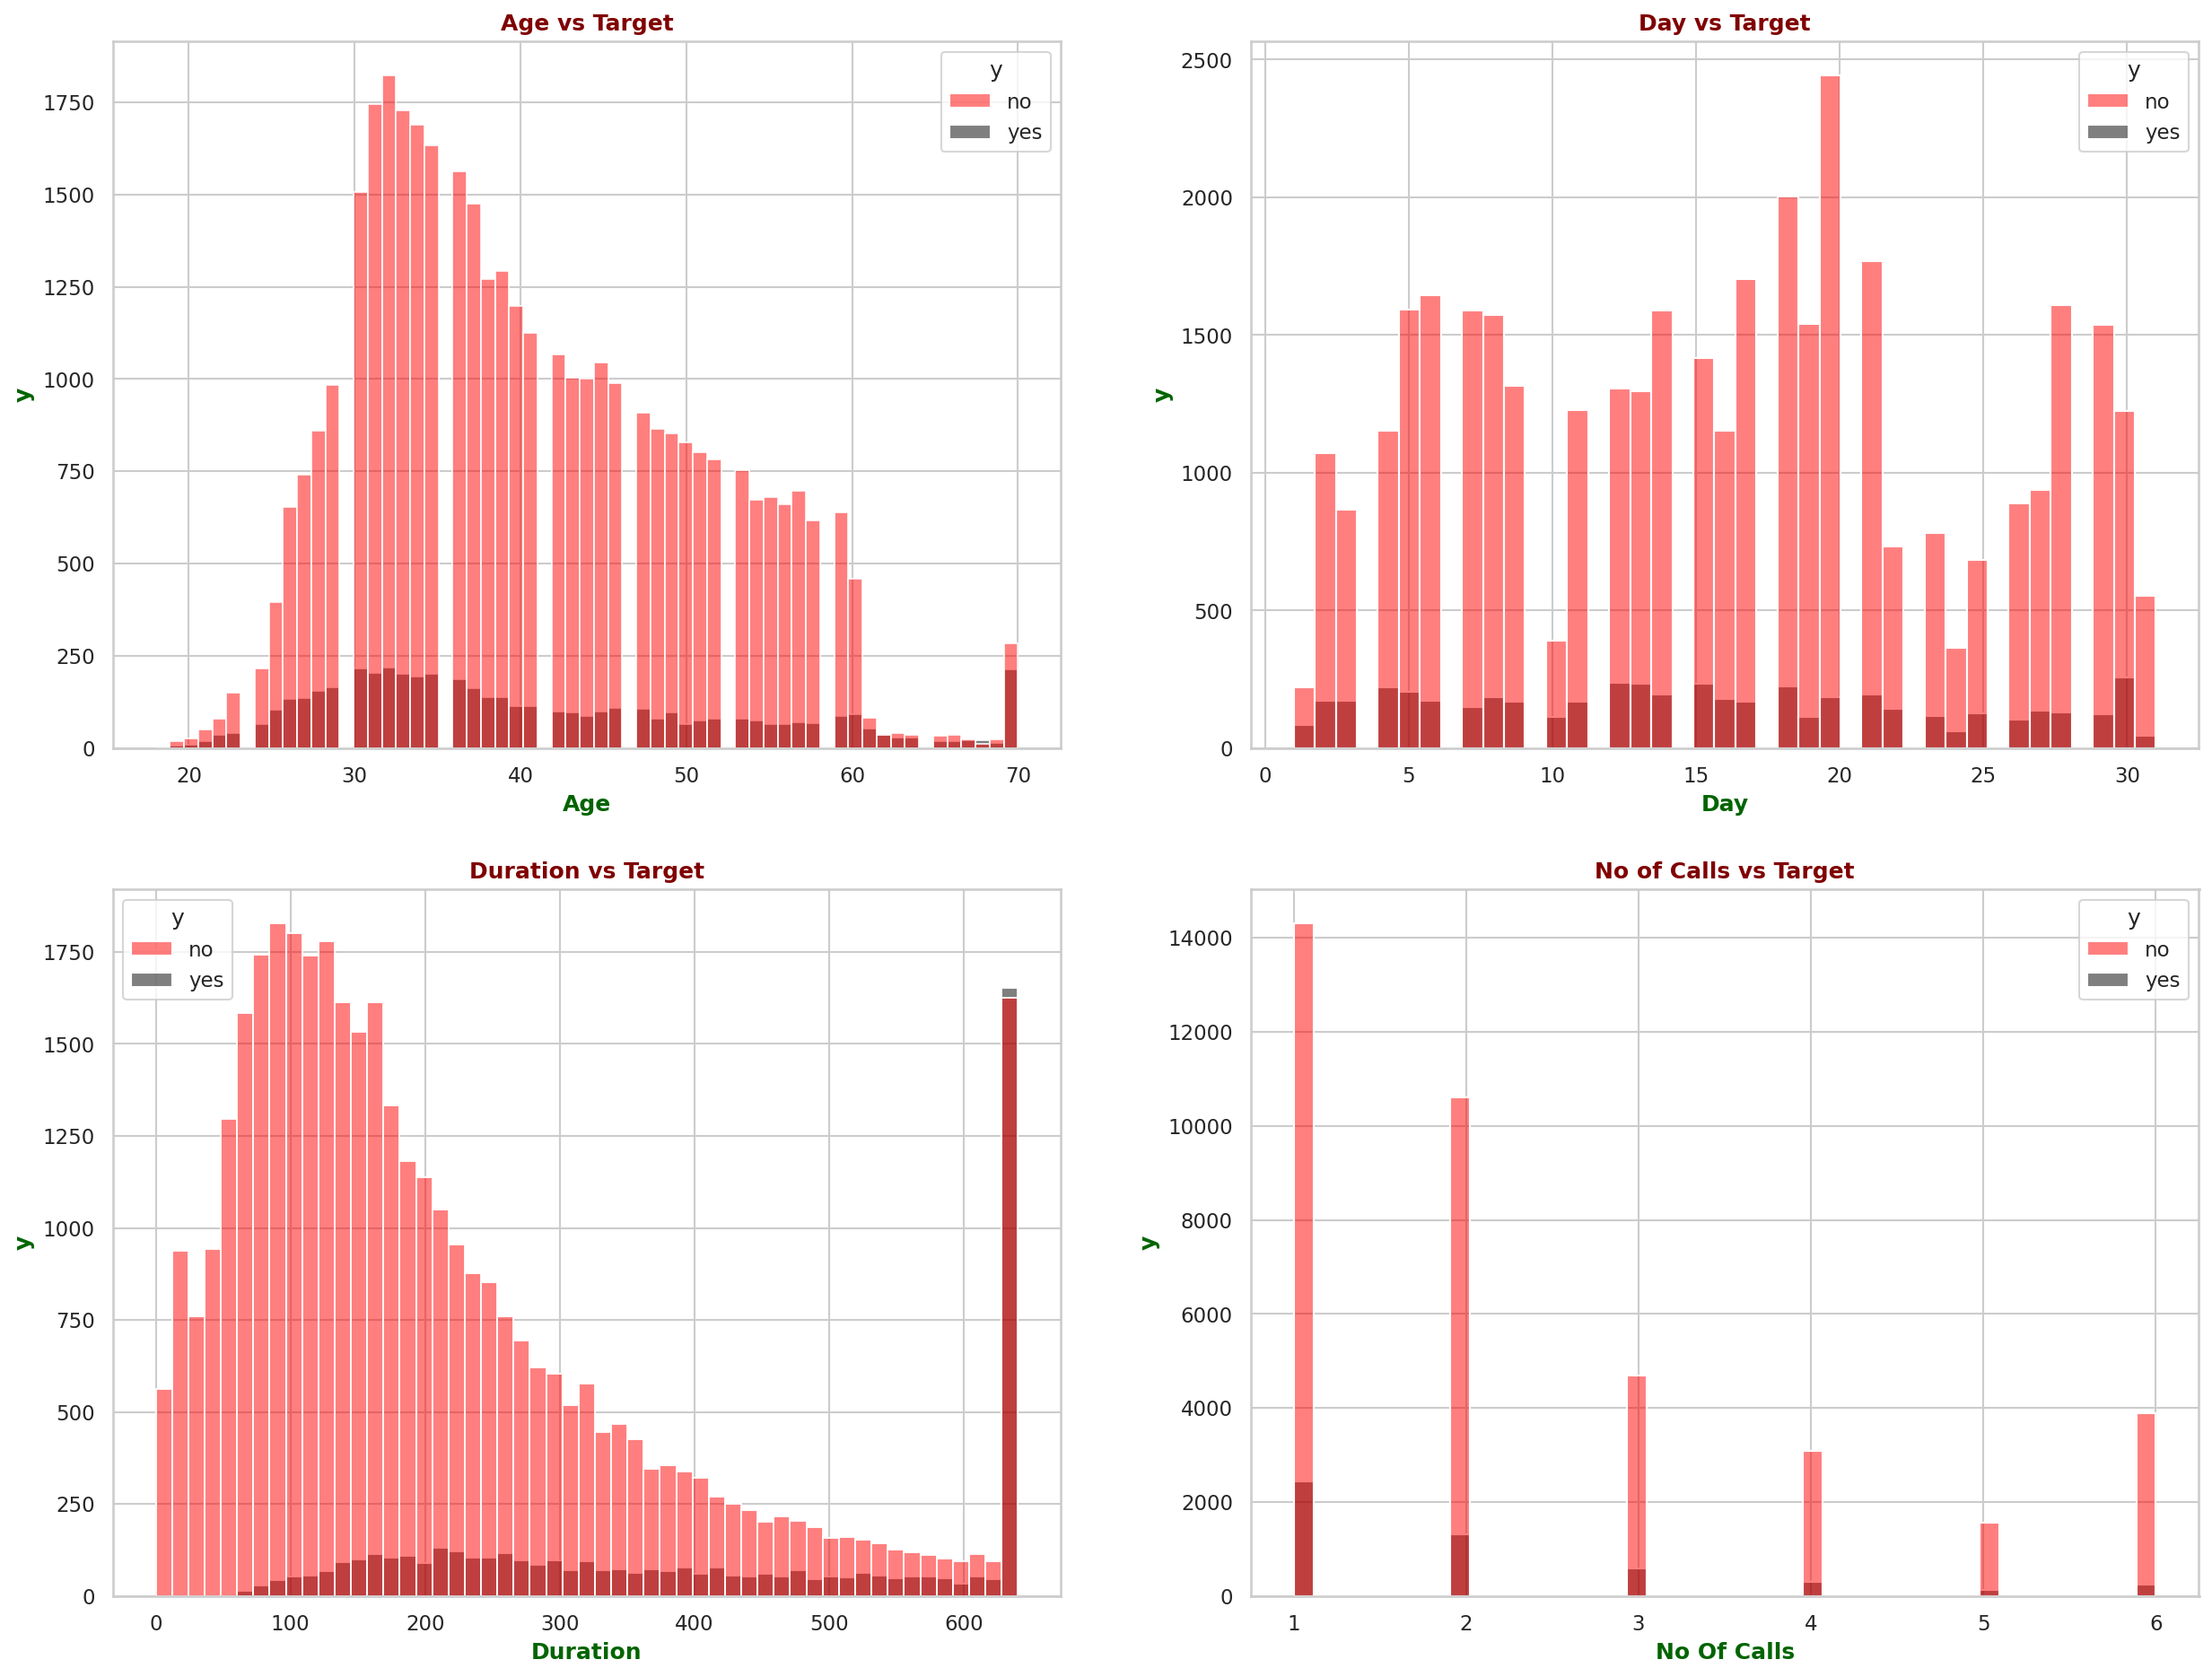

In [612]:
plt.figure(figsize=(20, 15), dpi=150)

#Age vs Target
plt.subplot(221)
my_colors = ['red', 'black']
sns.histplot(x='age',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=0)
plt.title('Age vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Age', color='DarkGreen', fontweight='bold')
plt.ylabel('y', color='DarkGreen', fontweight='bold')

#Day vs Target
plt.subplot(222)
my_colors = ['red', 'black']
sns.histplot(x='day',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=0)
plt.title('Day vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Day', color='DarkGreen', fontweight='bold')
plt.ylabel('y', color='DarkGreen', fontweight='bold')

#Duration vs Target
plt.subplot(223)
my_colors = ['red', 'black']
sns.histplot(x='dur',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=0)
plt.title('Duration vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Duration', color='DarkGreen', fontweight='bold')
plt.ylabel('y', color='DarkGreen', fontweight='bold')

#No of Calls vs Target
plt.subplot(224)
my_colors = ['red', 'black']
sns.histplot(x='num_calls',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=0)
plt.title('No of Calls vs Target', fontweight='bold', color='maroon' )
plt.xlabel('No Of Calls', color='DarkGreen', fontweight='bold')
plt.ylabel('y', color='DarkGreen', fontweight='bold')

plt.show()


# **Encoding**

In [613]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [614]:
# Encoding for job column
df['job']=df['job'].map({'blue-collar':0,'entrepreneur':1,'services':2,'housemaid':3,'technician':4,'self-employed':5,'admin.':6,'management':7, 'unemployed':8, 'retired': 11, 'student' : 12})

# Encoding for marital status column
df['marital'] =df['marital'].map({'married': 0, 'divorced': 1, 'single' : 2})

# Encoding for educational qualification column
df['education_qual'] = df['education_qual'].map({'primary': 0, 'secondary': 1, 'tertiary' :2})

# Encoding for month column
df['mon']=df['mon'].map({'may': 0, 'jul' : 1, 'jan': 2, 'nov': 3, 'jun' : 4, 'aug' : 5, 'feb' : 6, 'apr' : 7, 'oct' : 8, 'dec' : 9 , 'sep': 10, 'mar': 11})

# Encoding for call type column
df['call_type'] = df['call_type'].map({'unknown': 0, 'telephone' : 1, 'cellular' : 2})

# Encoding for previous outcome column
df['prev_outcome']=df['prev_outcome'].map({'unknown' : 0, 'failure' : 1, 'other' : 2, 'success': 3})

# Encoding for y column
df['y'] = df["y"].map({"yes":1 , "no": 0})

In [615]:
df.head(10)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,0,2,0,5,0,261,1,0,0
1,44,4,2,1,0,5,0,151,1,0,0
2,33,1,0,1,0,5,0,76,1,0,0
5,35,7,0,2,0,5,0,139,1,0,0
6,28,7,2,2,0,5,0,217,1,0,0
7,42,1,1,2,0,5,0,380,1,0,0
8,58,11,0,0,0,5,0,50,1,0,0
9,43,4,2,1,0,5,0,55,1,0,0
10,41,6,1,1,0,5,0,222,1,0,0
11,29,6,2,1,0,5,0,137,1,0,0


# **Splitting, Balancing and Scalling**

In [616]:
x = df.drop('y',axis=1)
y = df['y']

In [617]:
# splitting

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )


In [618]:
#Balancing

from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
X_train_balanced, y_train_balanced = smt.fit_resample(X_train, y_train)

In [619]:
len(X_train_balanced)

51344

In [620]:
len(y_train_balanced)

51344

In [621]:
#scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# **Building Machine Learning Model**

## **Logistic Regression**


In [622]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
lr.fit(X_train_scaled,y_train_balanced)

lr.score(X_test_scaled,y_test)

0.7475109979161842

In [623]:
lr_pred_probs=lr.predict_proba(X_test_scaled)
lr_pred_probs

array([[0.80270966, 0.19729034],
       [0.99089254, 0.00910746],
       [0.82293688, 0.17706312],
       ...,
       [0.30120683, 0.69879317],
       [0.09117122, 0.90882878],
       [0.93516359, 0.06483641]])

In [624]:
cross_val_linear_model=cross_val_score(lr,X_train_scaled,y_train_balanced,cv=10).mean()
print("Cross Validation score for logistic regression  :",cross_val_linear_model)

Cross Validation score for logistic regression  : 0.8859651808646103


In [625]:
log_reg_auc = roc_auc_score(y_test,lr_pred_probs[:,1])
print("AUROC score for logistic regression  :  ",round(log_reg_auc,2))

AUROC score for logistic regression  :   0.87


## **K-Nearest Neighbour (KNN)**

In [626]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_values=np.arange(1,20)
for i in knn_values:
  knn= KNeighborsClassifier(i)
  knn.fit(X_train_scaled, y_train_balanced)
  print("K value :", i, "Train Score : ", knn.score(X_train_scaled,y_train_balanced), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, X_test_scaled, y_test, cv=10)))

K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.8673306671387495
K value : 2 Train Score :  0.9822374571517607 Cross Value Accuracy : 0.888400712415776
K value : 3 Train Score :  0.9664030850732316 Cross Value Accuracy : 0.8849286243079698
K value : 4 Train Score :  0.9618650669990652 Cross Value Accuracy : 0.8919894800652333
K value : 5 Train Score :  0.9534317544406357 Cross Value Accuracy : 0.8900214851293935
K value : 6 Train Score :  0.9518152072296666 Cross Value Accuracy : 0.8930308785030686
K value : 7 Train Score :  0.9466539420380181 Cross Value Accuracy : 0.8923368364018712
K value : 8 Train Score :  0.9452516360236833 Cross Value Accuracy : 0.8931471557014719
K value : 9 Train Score :  0.9421159239638517 Cross Value Accuracy : 0.8933781007252908
K value : 10 Train Score :  0.9405188532253038 Cross Value Accuracy : 0.894305233680958
K value : 11 Train Score :  0.938921782486756 Cross Value Accuracy : 0.8944201697352044
K value : 12 Train Score :  0.9376752882517918 C

**K=13 is a good cross validation accuracy of 0.8952308913780526**

In [627]:
knn_classifier=KNeighborsClassifier(n_neighbors=13)
knn_classifier.fit(X_train_scaled,y_train_balanced)

KNeighborsClassifier(n_neighbors=13)

In [628]:
cross_val_knn_classifier=cross_val_score(knn_classifier,X_train_scaled,y_train_balanced,cv=15).mean()
cross_val_knn_classifier

0.9253856417256002

In [629]:
knn_auc = roc_auc_score( y_test, knn.predict_proba(X_test_scaled)[:, 1])
print( "AUROC on the sampled dataset : ",knn_auc)

AUROC on the sampled dataset :  0.882839984535305


## **Decision Tree**

In [630]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [631]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train_balanced, y_train_balanced) # the model is trained
  trainAccuracy = accuracy_score(y_train_balanced, dt.predict(X_train_balanced)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train_balanced, y_train_balanced, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.7870637270177625  Cross val score :  0.7868495195365945
Depth  :  2  Training Accuracy :  0.804962605172951  Cross val score :  0.8048455169708861
Depth  :  3  Training Accuracy :  0.8562246805858523  Cross val score :  0.8556206764836747
Depth  :  4  Training Accuracy :  0.8635088812714241  Cross val score :  0.862476583738856
Depth  :  5  Training Accuracy :  0.8829074478030539  Cross val score :  0.8817193963226618
Depth  :  6  Training Accuracy :  0.8934247429105641  Cross val score :  0.8911070819088354
Depth  :  7  Training Accuracy :  0.907272514802119  Cross val score :  0.9031437513584333
Depth  :  8  Training Accuracy :  0.9203607042692428  Cross val score :  0.9141283855572315
Depth  :  9  Training Accuracy :  0.9317349641632907  Cross val score :  0.92209417788279
Depth  :  10  Training Accuracy :  0.9401488002492988  Cross val score :  0.9271778459960498
Depth  :  11  Training Accuracy :  0.9482899657214086  Cross val score :  0.93231970

**k= 5 is the good cross validation score of 0.8966209872966827**

In [632]:
dt_classifier=DecisionTreeClassifier(max_depth=5, random_state=0)
dt_classifier.fit(X_train_balanced,y_train_balanced)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [633]:
cross_val_dt_classifier=cross_val_score(dt_classifier,X_train_balanced,y_train_balanced,cv=10).mean()
cross_val_dt_classifier

0.8817193963226618

In [634]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_balanced,y_train_balanced)
print("Decision Tree Score : ", dt.score(X_train_balanced,y_train_balanced))
dt_auc = roc_auc_score( y_test, dt.predict_proba(X_test)[:, 1])
print( "AUROC on the sampled dataset : ",dt_auc)

Decision Tree Score :  0.8829074478030539
AUROC on the sampled dataset :  0.8631279650819305


## **XG Boost**

In [635]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for xg in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  xgboost = xgb.XGBClassifier(learning_rate = xg, n_estimators=100, verbosity = 0)
  xgboost.fit(X_train_scaled,y_train_balanced)
  print("Learning rate : ", xg," Train score : ", xgboost.score(X_train_scaled,y_train_balanced)," Cross-Val score : ", np.mean(cross_val_score(xgboost, X_test, y_test, cv=10)))


Learning rate :  0.01  Train score :  0.9214124337799938  Cross-Val score :  0.8910626153383975
Learning rate :  0.02  Train score :  0.9267684636958554  Cross-Val score :  0.8944200356207889
Learning rate :  0.03  Train score :  0.9313843876597071  Cross-Val score :  0.8975461085361143
Learning rate :  0.04  Train score :  0.9377726706138985  Cross-Val score :  0.8989352656538345
Learning rate :  0.05  Train score :  0.942817076971019  Cross-Val score :  0.9011354126432343
Learning rate :  0.1  Train score :  0.9578529136802743  Cross-Val score :  0.9000932095189047
Learning rate :  0.11  Train score :  0.9587098784668121  Cross-Val score :  0.8980102785288183
Learning rate :  0.12  Train score :  0.9605796198192583  Cross-Val score :  0.8969666001459166
Learning rate :  0.13  Train score :  0.9621572140853849  Cross-Val score :  0.8989349974250033
Learning rate :  0.14  Train score :  0.9620987846681209  Cross-Val score :  0.8997461214110984
Learning rate :  0.15  Train score :  0.96

**Learning Rate 0.05 is getting the best cross validation score of 0.9011354126432343**

In [636]:
y_pred_proba = xgboost.predict_proba(X_test_scaled)[:, 1]
xgb_auc = roc_auc_score(y_test, y_pred_proba)

print("AUROC Score:",xgb_auc)

AUROC Score: 0.9036439510846692


In [637]:
  xgb_classifier= xgb.XGBClassifier(learning_rate =0.05,n_estimators=100) # initialise the model
  xgb_classifier.fit(X_train_scaled,y_train_balanced) #train the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [638]:
cross_val_xgb_classifier=cross_val_score(xgb_classifier,X_train_scaled,y_train_balanced,cv=15).mean()
cross_val_xgb_classifier

0.9373246518449158

## **Random Forest**

In [639]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(X_train_scaled, y_train_balanced) # the model is trained
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, X_train_scaled, y_train_balanced, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.9968058585229044  Cross val score :  0.8117402626171666
Depth  :  2  Training Accuracy :  0.9968058585229044  Cross val score :  0.8571984960791774
Depth  :  3  Training Accuracy :  0.9968058585229044  Cross val score :  0.8725652531626602
Depth  :  4  Training Accuracy :  0.9968058585229044  Cross val score :  0.8871338716364432
Depth  :  5  Training Accuracy :  0.9968058585229044  Cross val score :  0.8980988950839981
Depth  :  6  Training Accuracy :  0.9968058585229044  Cross val score :  0.9055779955991502
Depth  :  7  Training Accuracy :  0.9968058585229044  Cross val score :  0.9144008915495112
Depth  :  8  Training Accuracy :  0.9968058585229044  Cross val score :  0.9227173142450296
Depth  :  9  Training Accuracy :  0.9968058585229044  Cross val score :  0.9295731266706596
Depth  :  10  Training Accuracy :  0.9968058585229044  Cross val score :  0.9360003815941151


**Depth = 8 is giving the good cross validation score for 0.904193866546222**

In [640]:
rf_classifier=RandomForestClassifier(max_depth=8, random_state=0)
rf_classifier.fit(X_train_scaled,y_train_balanced)

RandomForestClassifier(max_depth=8, random_state=0)

In [641]:
cross_val_rf_classifier=cross_val_score(rf_classifier,X_train_scaled,y_train_balanced,cv=15).mean()
cross_val_rf_classifier

0.9220941364609367

In [642]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train_scaled, y_train_balanced)
y_pred= rf.predict_proba(X_test_scaled)[:,1]
rf_auc = roc_auc_score(y_test, y_pred)
print( "AUROC on the sampled dataset : ",rf_auc)

AUROC on the sampled dataset :  0.8950692782769115


#**Cross-Validation Score for Machine-Learning Models**

In [643]:
print("Cross Validation Score for Logistic Regression Model:",cross_val_linear_model)
print("Cross Validation Score for K-Nearest Neighbors Model:",cross_val_knn_classifier)
print("Cross Validation Score for Decision Tree Model: ",cross_val_dt_classifier)
print("Cross Validation Score for Extreme-Gradient Boosting Model: ",cross_val_xgb_classifier)
print("Cross Validation Score for Random Forest Model: ",cross_val_rf_classifier)

Cross Validation Score for Logistic Regression Model: 0.8859651808646103
Cross Validation Score for K-Nearest Neighbors Model: 0.9253856417256002
Cross Validation Score for Decision Tree Model:  0.8817193963226618
Cross Validation Score for Extreme-Gradient Boosting Model:  0.9373246518449158
Cross Validation Score for Random Forest Model:  0.9220941364609367


# **F1 Score for Machine-Learning Models**

In [644]:
from sklearn.metrics import f1_score

In [645]:
y_pred_lr= lr.predict(X_test_scaled)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_dt= dt.predict(X_test)
y_pred_rf= rf.predict(X_test_scaled)
y_pred_xgb= xgboost.predict(X_test_scaled)

In [646]:
F1_score_lr= f1_score(y_test,y_pred_lr)
F1_score_knn= f1_score(y_test,y_pred_knn)
F1_score_dt= f1_score(y_test,y_pred_dt)
F1_score_rf= f1_score(y_test,y_pred_rf)
F1_score_xgb= f1_score(y_test,y_pred_xgb)

In [647]:
print("F1 Score for Linear Regression Model:",F1_score_lr)
print("F1 Score for K-Nearest Neighbors Regression Model:",F1_score_knn)
print("F1 Score for Decision Tree Regression Model: ",F1_score_dt)
print("F1 Score for Extreme-Gradient Boosting Regression Model: ",F1_score_xgb)
print("F1 Score for Random Forest Regression Model: ",F1_score_rf)

F1 Score for Linear Regression Model: 0.4394757131842715
F1 Score for K-Nearest Neighbors Regression Model: 0.4796703296703296
F1 Score for Decision Tree Regression Model:  0.4364007137394851
F1 Score for Extreme-Gradient Boosting Regression Model:  0.5398018448923811
F1 Score for Random Forest Regression Model:  0.47031127386868954


#**AUROC Score for Machine-Learning Models**

In [648]:
print("AUROC Score for Logistic Regression Model:",log_reg_auc)
print("AUROC Score for K-Nearest Neighbors Model:",knn_auc)
print("AUROC Score for Decision Tree Model: ",dt_auc)
print("AUROC Score for Extreme-Gradient Boosting Model: ",xgb_auc)
print("AUROC Score for Random Forest Model: ",rf_auc)

AUROC Score for Logistic Regression Model: 0.8731126386998064
AUROC Score for K-Nearest Neighbors Model: 0.882839984535305
AUROC Score for Decision Tree Model:  0.8631279650819305
AUROC Score for Extreme-Gradient Boosting Model:  0.9036439510846692
AUROC Score for Random Forest Model:  0.8950692782769115


**Models are tested**

**Hence Extreme-Gradient Boosting Model is giving the good**

*   F1 score of 0.545
*   AUROC Score of 0.911

**so Extreme-Gradient Boosting Model: is the best model for customer convertion prediction**

# **Feature Importance**

In [649]:
xgb_classifier.feature_importances_

array([0.02760944, 0.05094334, 0.02389128, 0.021287  , 0.17507899,
       0.04101079, 0.14493842, 0.3208077 , 0.06745577, 0.12697734],
      dtype=float32)

In [650]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

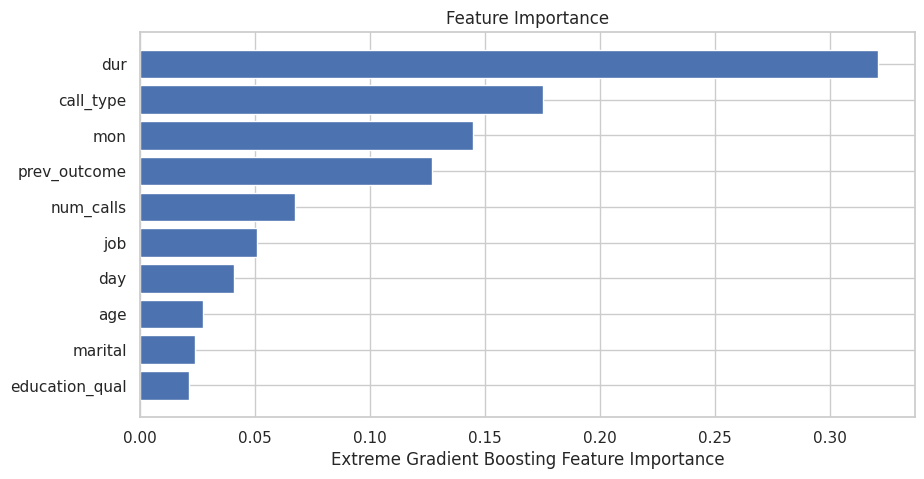

In [651]:
sorted_idx = xgb_classifier.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], xgb_classifier.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()

# **Conclusion**

Based on the Feature Importance given by best machine Learning **(Extreme-Gradient Boosting Model)** that will predict if a client subscribed to the insurance.

The client should focused on the top few features of order given below to have them subscribed to the insurance.

1) Duration

2) Call Type

3) Month

4) Previous Outcome

5) Number of Calls

6) Job

7) Day

8) Age

9) Marital Status

10) Educational Qualifications